<a href="https://colab.research.google.com/github/tamaravera14/SIMULACI-N-I/blob/main/Flecha_y_Cojinete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flecha y cojinete
---

## Bazaldua Vera Tamara Alheli

---

Metodología de la Simulación
1. Identifique las variables
  * Aquellas cuyo comportamiento define el comportamiento o la evoución global del sistema real.
  * $X_{1}$ ~ $N(\mu_{1},\sigma_{1})$
  * $X_{2}$ ~ $N(\mu_{2},\sigma_{2})$
2. Determine la distribución de probabilidad
  * Elija el tipo de distribución de probabilidad que mejor defina el comportamiento aleatorio de cada una de las variables del sistema identificadas en el paso anterior.
    * $f_{1}(x) = \frac{1}{\sqrt{2\pi}\sigma_{1}^{2}} e^{-\frac{(x-\mu_{1})^{2}}{2\sigma_{1}}}$
    * $f_{2}(x) = \frac{1}{\sqrt{2\pi}\sigma_{2}^{2}} e^{-\frac{(x-\mu_{2})^{2}}{2\sigma_{2}}}$

3. Modele las variables aleatorias
  * Cosntruya un modelo fiel de la aleatoriedad de las variables del sistema. Simular el comportamiento del sistema implica generar muestras aleatorias de cada variable que sigan fielmente la distribución de probabilidad correspondiente.
    * Box Müller
4. Defina el modelo del sistema y los objetivos de la simulación
  * Fije los objetivos y diseñe un modelo del sistema real que abstraiga sus propiedades más relevantes. Todo error en el modelo (o su implementación computacional) puede dar lugar a conclusiones equivocadas.
  Antes de experimentar con el modelo, asegurarse de que refleja fielmente el sistema real validando el mismo a partir de datos reales, para ello compare los resultados obtenidos de la simulación con los producidos por el sistema.
  * Condición de Frontera:
    *  $X_{2} \ge X_{1} $
  * Buscamos:
    *  $P(X_{2} \ge X_{1})$
5. Diseñe el experimento:
    * Diseñe un experimento así como las ejecuciones concretas del mismo, los escenarios que desea estudiar para alcanzar los objetivos fijados. El experimento consiste en generar valores de las variables cuyo comportamiento define el comportamiento del sistema y analizar este ante dichos valores.
    * n = la cantidad de veces necesarias para
      * Generar($x_{1},x_{2}$)
      * Si $x_{1} \geq x_{2}$
      * Calcular la probabilidad de la forma de la suma de interferencias:
        * $p = \frac{exitos}{n}$
6. Repita el experimento M veces.
  * Así dispondrá de observaciones sobre el comportamiento del sistema, lo que permitirá entender su funcionamiento así como evaluar el desempeño del mismo frente a los diversos escenarios establecidos.
El método Monte Carlo se basa en la Ley Fuerte de los Grandes Números y el Teorema del Límite Central.

7. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para garantizar la convergencia del resultado.
  * Determinamos el tamaño de la muestra: $M$

8. Replique el modelo.
  * Realizar el experimento varias veces.

9. Calcule la probabilidad.
  * Calcular la probabilidad de la forma de la suma de interferencias:
    * $p = \frac{exitos}{n}$
10. Halle el intervalo de confianza de la probabilidad.

---
5.4. Una flecha será ensamblada en un cojinete como se muestra a continuación:

Si $x_1$ sigue una distribución normal con media 1.5 y varianza 0.0016, y $x_2$ sigue esta misma distribución con media 1.48 y varianza 0.0009, determine:



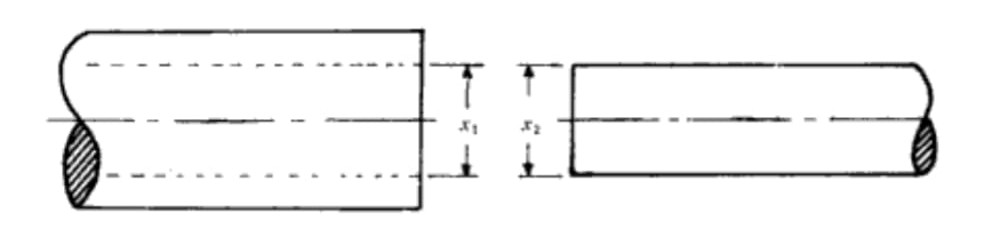

a) La probabilidad de que haya interferencia.

b) El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de
   interferencia estimada difiera de su valor verdadero en menos de 0.01, con un nivel de seguridad del 95%.

---

In [39]:
import random
from matplotlib import pyplot as plt
import numpy as np
from math import sqrt
import math
from statistics import stdev
import scipy.stats as stats
from scipy.stats import norm

Dado que para este caso en particular tenemos $\mu_{1}, \mu_{2}$ por un teorema podemos calcular $$\mu_{r} = \mu_{2} - \mu_{1}$$
De manera análoga, tenemos $\sigma_{1}, \sigma_{2}$ por un teorema podemos calcular $$\sigma_{r} = \sqrt{\sigma_{2}^{2} - \sigma_{1}^{2}}$$

In [38]:
mu1 = 1.5
mu2 = 1.48
sig1 = 0.04
sig2 = 0.03
mur = mu2 - mu1
sig = math.sqrt(sig1**2 + sig2**2)
print("mu_r = ",mur)
print("sigma_r = ",sig)

mu_r =  -0.020000000000000018
sigma_r =  0.05


In [4]:
def experimento(n):
  exitos = 0
  for i in  range(n):
    x1 = np.random.normal(mu1,sig1,1)     # Generamos la X1 con el método de Box Müller con este comando
    x2 = np.random.normal(mu2,sig2,1)     # Generamos la X2 con el método de Box Müller con este comando
    if x2 >= x1:                          # Verificamos que x2  >= x1, ya que ese cuenta como éxito
      exitos +=1                          # Del experimento vamos almacenando la cantidad de éxitos
  prob = exitos / n                       # Calculamos la probabilidad de ese experimento
  return prob

In [5]:
def muestra(M):
  lista = []
  for i in range(1,M):
    e = experimento(i)        # Repetimos el experimento M veces, para generar una muestra
    lista.append(e)           # Almacenamos en una lista la muestra obtenida
  return lista

In [9]:
p = muestra(1000)
mu = np.mean(p)       # Calculamos la media de la simulación
var = np.var(p)       # Calculamos la varianza de la simulación
des = stdev(p)        # Calculamos la desviación estándar de la simulación
print("Media de las simulaciones (Probabilidad):", mu)
print("Varianza de las simulaciones:", var)
print("Desviación estandar de las simulaciones:", des)

Media de las simulaciones (Probabilidad): 0.3431551026839153
Varianza de las simulaciones: 0.0016540316444846204
Desviación estandar de las simulaciones: 0.04069015840251521


Notemos que aquí la probabilidad haciendo las simulaciones fue de 0.3431

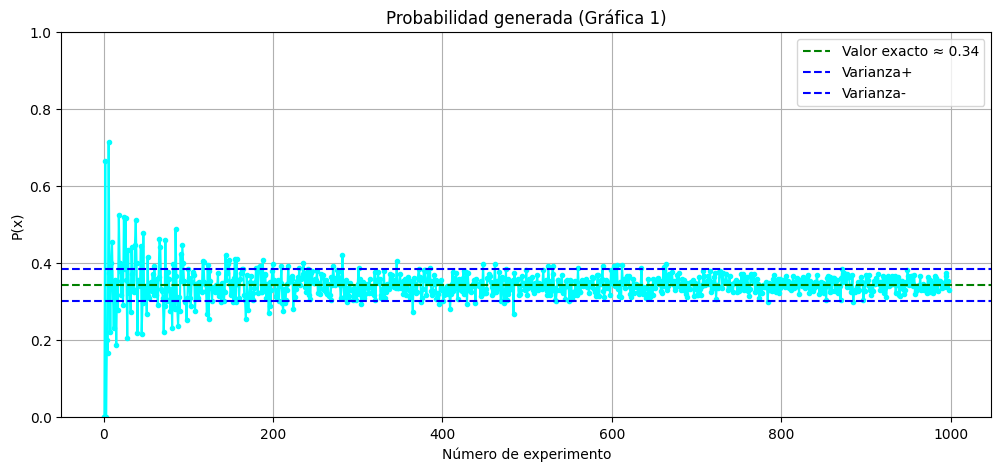

In [65]:
# Gráfico
plt.figure(figsize=(12, 5))
plt.plot(p, marker='o', markersize=3, linestyle='-', color = "cyan")
plt.axhline(mu, color='green', linestyle='--', label="Valor exacto ≈ 0.34")
plt.axhline(mu + des, color='blue', linestyle='--', label="Varianza+")
plt.axhline(mu - des, color='blue', linestyle='--', label="Varianza-")
plt.ylim(0, 1)
plt.title("Probabilidad generada (Gráfica 1)")
plt.xlabel("Número de experimento")
plt.ylabel("P(x)")
plt.legend()
plt.grid(True)
plt.show()

Para calcular el intervalo de confianza con un nivel de aceptación del 95%, como mencionamos al inicio, conocemos la varianza por lo tanto podemos usar la Distribución Normal:

Intervalo de confianza: $$ \frac{2\sigma_{r} Z_{\frac{\alpha}{2}}}{\sqrt{n}} $$

Teniendo así:

$$\mu_{r} - \frac{\sigma_{r} Z_{\frac{\alpha}{2}}}{\sqrt{n}} \leq \mu_{r} \leq \mu_{r} + \frac{\sigma_{r} Z_{\frac{\alpha}{2}}}{\sqrt{n}}$$

Lo cual nos indica que el intervalo de confianza sería más pequeño entre mayor sea el número de observaciones que tienen de la variable aleatoria X.

In [21]:
# Nivel de confianza
confianza = 0.95

# Cálculo de z_{α/2}
alpha = 1 - confianza
z_alpha_2 = norm.ppf(1 - alpha / 2)

print("z_{{α/2}} para un ",confianza*100,"% de confianza es: ",round(z_alpha_2, 4))

z_{{α/2}} para un  95.0 % de confianza es:  1.96


In [62]:
n = 1000
niv_confianza = abs((2 * sig * z_alpha_2) / sqrt(n))
print("El nivel de confianza es: ",niv_confianza)
print("El intervalo de confianza es: [",mu - niv_confianza/2,",",mu + niv_confianza/2,"]")

El nivel de confianza es:  0.006197950323045616
El intervalo de confianza es: [ 0.3400561275223925 , 0.3462540778454381 ]


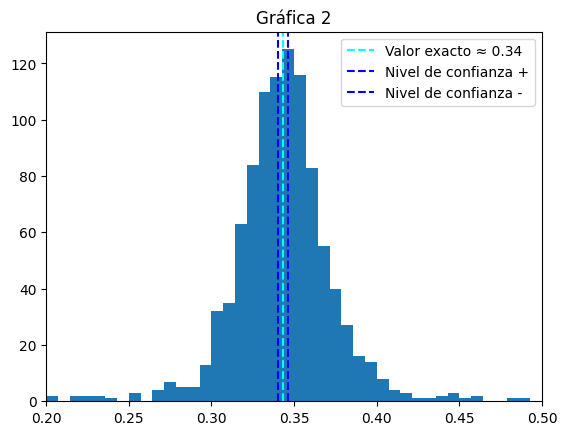

In [66]:
plt.hist(p, bins = 100)
plt.axvline(mu, color='cyan', linestyle='--', label="Valor exacto ≈ 0.34")
plt.axvline(mu + niv_confianza/2, color='blue', linestyle='--', label="Nivel de confianza +")
plt.axvline(mu - niv_confianza/2, color='blue', linestyle='--', label="Nivel de confianza -")
plt.title("Gráfica 2")
plt.xlim(0.2, 0.5)
plt.legend()
plt.show()

Calculamos de manera analítica los resultados de la muestra.

In [13]:
integral = stats.norm.cdf(0,-0.02,0.05)
probabilidad = 1 - integral
print("La probabilidad de manera analítica es: ", probabilidad)

La probabilidad de manera analítica es:  0.3445782583896758


Probabilidad de interferencia analíticamente:

Queremos obtener:

$
P(x_2 \geq x_1) = P(x_2 - x_1 \geq 0)
$

Por el Teorema del Límite Central:

$
X \sim N \left( \mu_{r},\sigma_{r} \right)
$

Con:
  * $x = x_2 - x_1$
  * $\mu_{r} = \mu_2 - \mu_1 = -0.02$
  * $\sigma_{r} = \sqrt{\sigma_2^2 + \sigma_1^2} = 0.05$

Podemos definir ahora:

$
Z = \frac{x- (\mu_r)}{\sigma_{r}} \sim \mathcal{N}(0, 1)
$

De manera que:

$
P(x\geq 0) = P\left( \frac{x - (\mu_r)}{\sigma_r} \geq \frac{-(\mu_r)}{{\sigma_r}} \right)
= P\left( Z \geq \frac{\mu_r}{\sigma_r} \right)
$

Sustituyendo nuestros valores, queremos calcular:

$
P(Z \geq 0.4) = \int_{0.4}^{\infty} \frac{1}{\sqrt{2\pi}} e^{-z^2/2} \, dz ≈ 0.3445
$


---

Respuesta

a) La probabilidad de que haya interferencia:

  * Analíticamente:
    * La probabilidad de que haya interferencia es de 0.3445782583896758
  * Simulación:
    * La probabilidad de que haya interferencia es de 0.3431551026839153
    * El nivel de confianza es: 0.006197950323045616
    * El intervalo de confianza es: [ 0.3400561275223925 , 0.3462540778454381 ]
    * Con un nivel de aceptacion del 95%

---

---

**Respuesta**

b) El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de 0.01, con un nivel de seguridad del 95%:

  * Analizando la gráfica 1, podemos ver que empieza a converger aproximadamente en ***M = 500***, ya que aun no hemos visto un metodo analítico para calcular dicho *número*
---